In [1]:
%cd /content/drive/MyDrive/Cursuri/Business Analyst/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Cursuri/Business Analyst/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


#Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [19]:
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


#Data Analytics

In [20]:
#summary statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

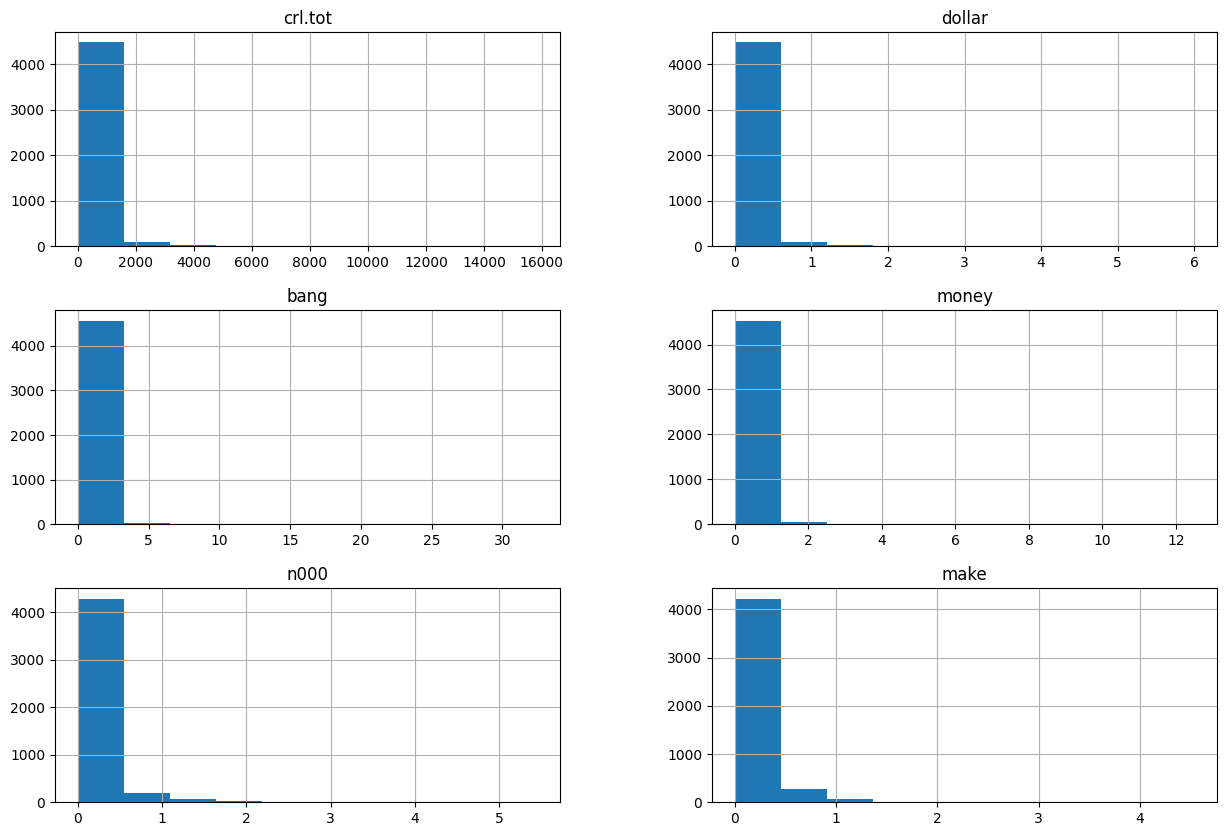

In [21]:
#histograms
df.hist(figsize = (15,10))

In [30]:
#removing outliers

print("Initial len: ", len(df))
df = df[df["crl.tot"] < 1500]
print("Len after removing crl.tot ourliers: ", len(df))
df = df[df['bang'] < 5]
print("Len after removing bangs: ", len(df))
df=df[df["money"]<6]
print("Len after removing money: ", len(df))

Initial len:  4431
Len after removing crl.tot ourliers:  4431
Len after removing bangs:  4431
Len after removing money:  4431


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

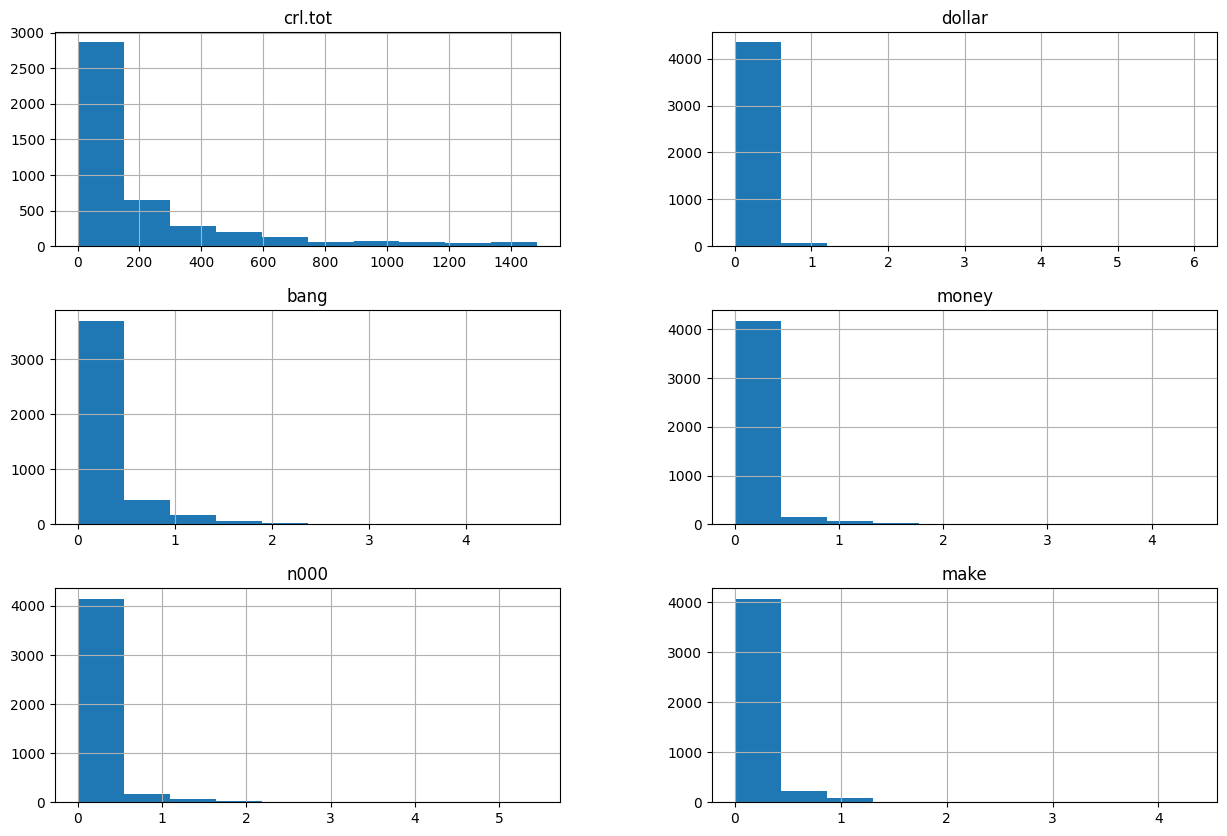

In [31]:
#new histogram
df.hist(figsize = (15,10))

<ipython-input-33-9fdb0314d31f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

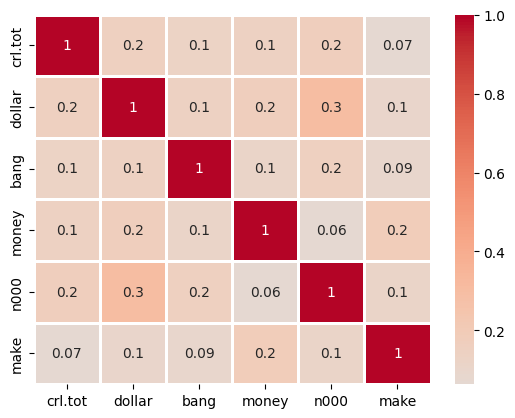

In [33]:
#Correlation Matrix
sns.heatmap(df.corr(),
            center = 0,
            annot = True,
            fmt = '.1g',
            linewidth = 1,
            cmap = 'coolwarm')

In [34]:
#No strong correlation in our data set

#Logistic Regression Preparation

In [35]:
#Prepare Dependent Variable (yesno)
df["yesno"] = np.where(df["yesno"] == "y", 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [40]:
#Prepare X and Y
y = df.yesno
x = df.iloc[:,:-1]
x = sm.add_constant(x)
x.head()

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21
3,1.0,191,0.00,0.137,0.00,0.00,0.00
4,1.0,191,0.00,0.135,0.00,0.00,0.00
5,1.0,54,0.00,0.000,0.00,0.00,0.00


In [41]:
#Trainin/Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1502)

#Logistic Regression

In [43]:
#Logistic Regression
model = sm.Logit(y_train, x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.391118
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3544
Model:                          Logit   Df Residuals:                     3537
Method:                           MLE   Df Model:                            6
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.4150
Time:                        16:12:49   Log-Likelihood:                -1386.1
converged:                       True   LL-Null:                       -2369.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1547      0.073    -29.378      0.000      -2.298      -2.011
crl.tot        0.0017      0.

In [44]:
#make column is not statistically significant

In [53]:
#Create a function
def readerLog(coefficient):
  probability = round((np.exp(coefficient) - 1)*100,2)
  if probability > 0:
    print("The likelihood increases by ", probability, "%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood decreases by ", probability, "%")

In [56]:
#Apply the function
readerLog(6.6219)

The likelihood increases by  75037.13 %


#Asses the model

In [61]:
#Predictions
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [62]:
#Check if dataset is balanced
y_test.mean()

0.3483652762119504

In [63]:
#35% share of 1

In [69]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[542  36]
 [109 200]]


In [79]:
#Accuracy
accuracy = round((tp+tn)/(tp+tn+fp+fn)*100,1)
print("Accuracy: ", accuracy, "%")

#F1 Score
f1 = round(2* tp / (2*tp+fn+fp)*100,1)
print("F1 Score: ", f1, "%")

#Specificity
specificity = tn / (tn+fp)
print("Specificity: ", round(specificity*100,1))

#Sensitivity
sensitivity = tp / (tp+fn)
print("Sensitivity: ", round(sensitivity*100, 1), "%")

Accuracy:  83.7 %
F1 Score:  73.4 %
Specificity:  93.8
Sensitivity:  64.7 %


In [80]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       578
           1       0.85      0.65      0.73       309

    accuracy                           0.84       887
   macro avg       0.84      0.79      0.81       887
weighted avg       0.84      0.84      0.83       887



In [ ]:
#Accuracy is good (84%)
#F1 score is good (73%)